# Some examples of image manipulation for evaluating OCR

In [1]:
import cv2                      # Computer Vision
import numpy as np              # Vector math
import matplotlib.pyplot as plt # Plotting
%matplotlib inline

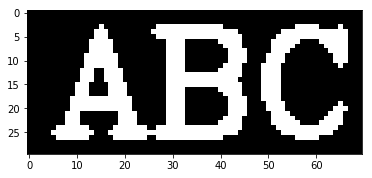

In [2]:
img = np.asarray(cv2.putText(np.zeros((30, 70)), "ABC", (5, 25), cv2.FONT_HERSHEY_COMPLEX,
                             1.0, (255, 255, 255), 2, cv2.LINE_AA)
                 , dtype=np.uint8)

plt.imshow(img, cmap='gray');

In [3]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

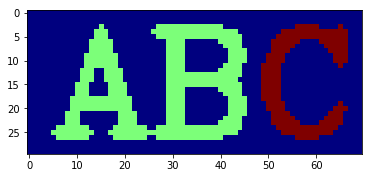

In [4]:
_, cc = cv2.connectedComponents(img, connectivity=4)
plt.imshow(cc, cmap='jet')

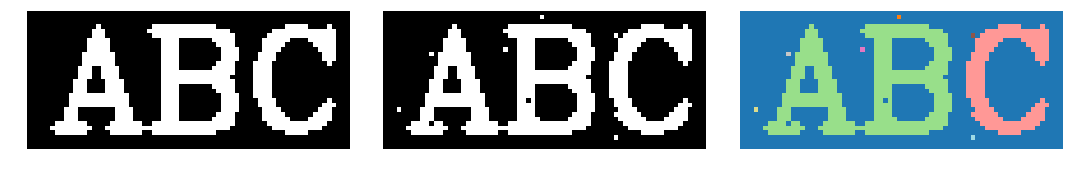

In [5]:

def salt_and_papper_noise(image, n_noise=10):
    img_sp = image.copy()
    for i in range(n_noise):
        a = np.random.randint(img_sp.shape[0])
        b = np.random.randint(img_sp.shape[1])
        if img_sp[a, b] == 0:
            img_sp[a, b] = 255
        else:
            img_sp[a, b] = 0
    return img_sp

img_sp = salt_and_papper_noise(img, 10)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_sp, cmap='gray')
plt.axis('off');
plt.subplot(1, 3, 3)
_, cc = cv2.connectedComponents(img_sp, connectivity=4)
plt.imshow(cc, cmap='tab20')
plt.axis('off');
plt.tight_layout()
plt.show()

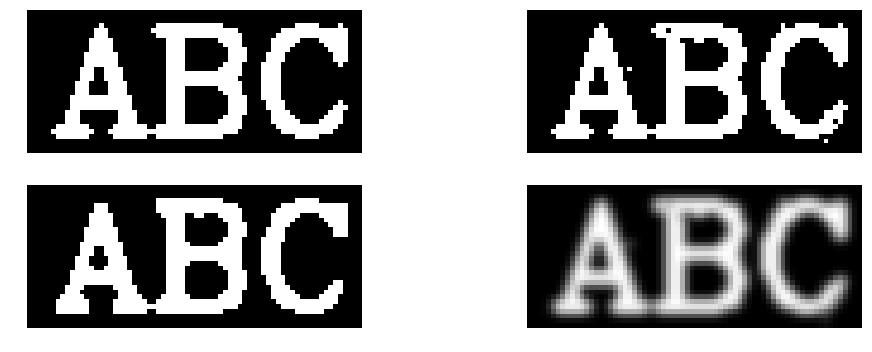

In [6]:
# Median filtering
img_sp = salt_and_papper_noise(img, 10)
img_median = cv2.medianBlur(img_sp, 3)
img_blur = cv2.GaussianBlur(img_sp, (5, 5), 0)

plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(img_sp, cmap='gray')
plt.axis('off');
plt.subplot(2, 2, 3)
plt.imshow(img_median, cmap='gray')
plt.axis('off');
plt.subplot(2, 2, 4)
plt.imshow(img_blur, cmap='gray')
plt.axis('off');
plt.tight_layout()
plt.show()

In [7]:
#img = cv2.medianBlur(img, 5)
#ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# TODO Image resizing
# TODO Binarization